
# Chapter 7 -> Spark ETL with Lakehouse | Delta Lake

Task to do 
1. Read data from MySQL server into Spark
2. Create HIVE temp view from data frame
3. Load filtered data into Delta format (create initial table)
4. Load filtered data again into Delta format into same table 
5. Read Delta tables using Spark data frame
6. Create Temp HIVE of delta tables
7. Write query to read data from delta 


In [1]:
# First Load all the required library and also Start Spark Session
# Load all the required library
from pyspark.sql import SparkSession

In [2]:
#Start Spark Session
spark = SparkSession.builder.appName("chapter1")\
        .config('spark.jars.packages', 'mysql:mysql-connector-java:8.0.32')\
        .getOrCreate()
sqlContext = SparkSession(spark)
#Dont Show warning only error
spark.sparkContext.setLogLevel("ERROR")

1. Read data from MySQL server into Spark

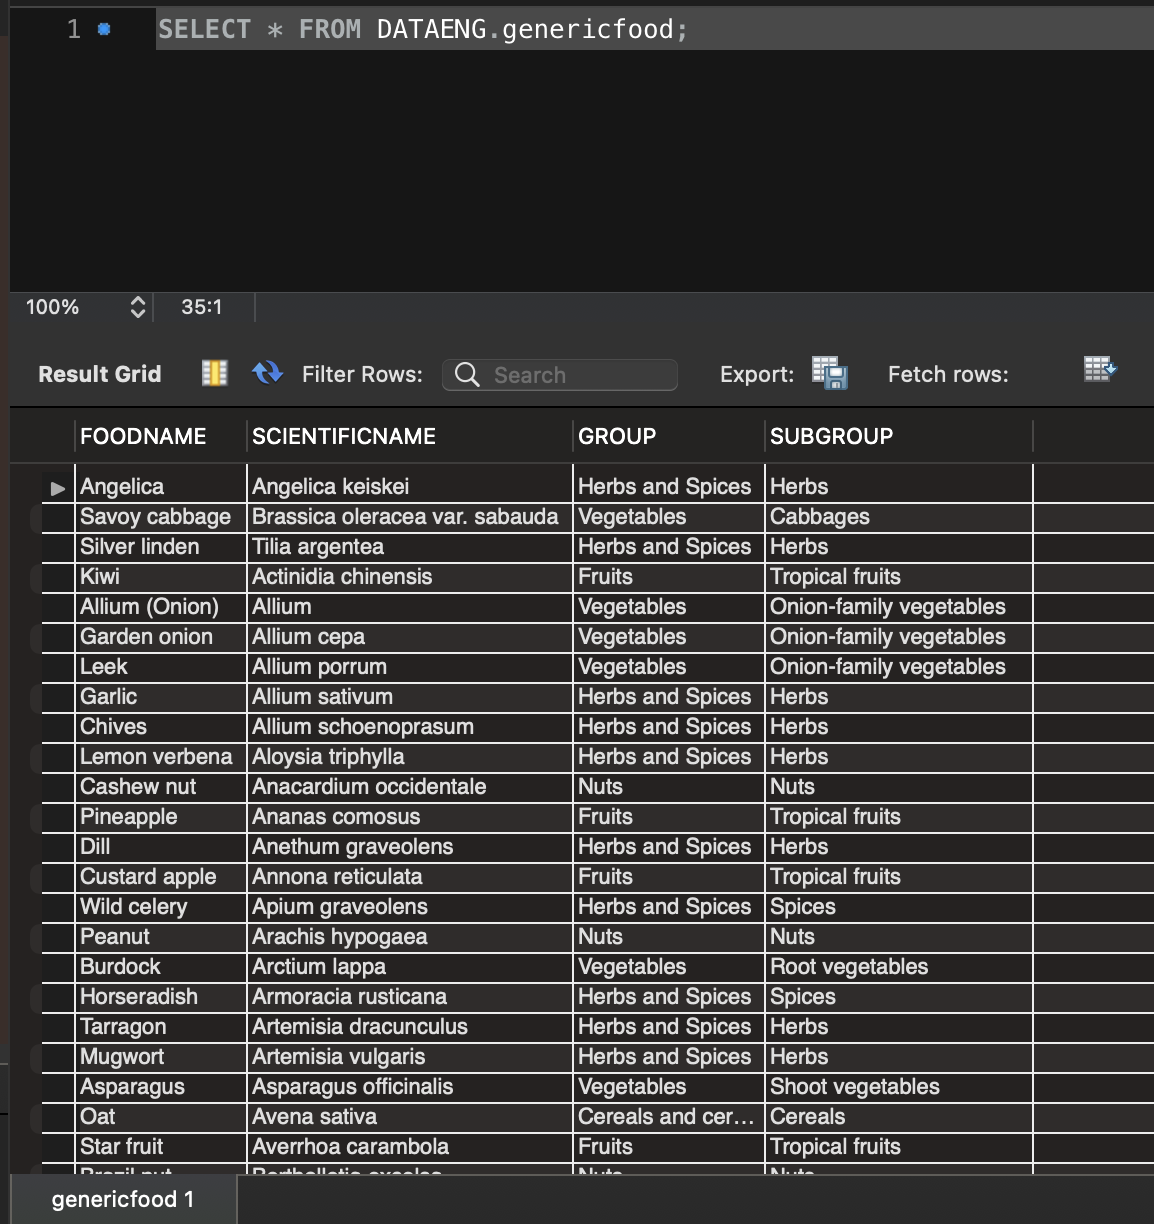


In [3]:
#Load CSV file into DataFrame
mysqldf = spark.read \
    .format("jdbc") \
    .option("driver","com.mysql.cj.jdbc.Driver") \
    .option("url", "jdbc:mysql://localhost:3306/DATAENG") \
    .option("dbtable", "genericfood") \
    .option("user", "root") \
    .option("password", "H.modi1997") \
    .load()

In [ ]:
#Checking dataframe schema
mysqldf.printSchema()

In [ ]:
mysqldf.show(n=10)

2. Create HIVE temp view from data frame

In [6]:
mysqldf.createOrReplaceTempView("tempFood")

3. Load filtered data into Delta format (create initial table)

In [ ]:
sqlContext.sql("SELECT * FROM tempFood").show(n=20)

In [ ]:
sqlContext.sql("SELECT GROUP,count(*) FROM tempFood GROUP BY 1 ORDER BY 2 DESC").show(truncate=False)

In [9]:
newdf = sqlContext.sql("SELECT * FROM tempFood WHERE GROUP = 'Herbs and Spices'")

In [ ]:
newdf.count()

In [ ]:
newdf.write.format("delta").save("onprem_warehouse",mode='append')

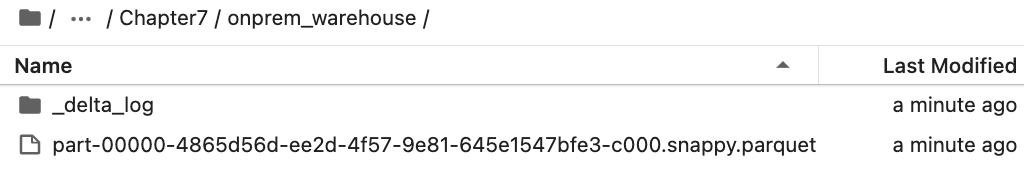

4. Load filtered data again into Delta format into same table 

In [18]:
newdf1 = sqlContext.sql("SELECT * FROM tempFood WHERE GROUP = 'Fruits'")

In [ ]:
newdf1.write.format("delta").save("onprem_warehouse",mode='append')

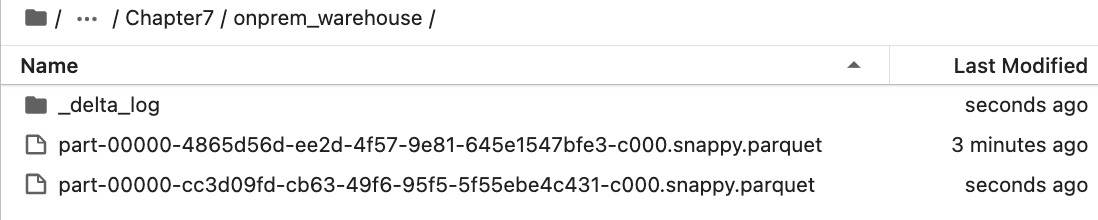

5. Read Delta tables using Spark data frame

In [20]:
#Load delta file into DataFrame
deltadf = spark.read.format("delta").load("onprem_warehouse")

In [ ]:
deltadf.printSchema()

In [ ]:
deltadf.show()

6. Create Temp HIVE of delta tables

In [24]:
deltadf.createOrReplaceTempView("tempDelta")

7. Write query to read data from delta 

In [ ]:
sqlContext.sql("SELECT * FROM tempDelta").show()

In [ ]:
sqlContext.sql("SELECT count(*) FROM tempDelta").show()

In [ ]:
sqlContext.sql("SELECT DISTINCT(SUBGROUP) FROM tempDelta").show()

In [ ]:
sqlContext.sql("SELECT SUBGROUP,count(*) FROM tempDelta GROUP BY SUBGROUP ORDER BY 2 DESC ").show()